In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Making a pairwise distance matrix in pandas
Distance matrices has significant importance in cluster analysis of the data

*For learning Purpose*
[Bloglink (Reference)](https://drawingfromdata.com/pandas/clustering/making-a-pairwise-distance-matrix-in-pandas.html)

> Olympic medal dataset

In [2]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/mojones/binders/master/olympics.csv", sep="\t")
data

,City,Year,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Country,Int Olympic Committee code
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,Hungary,HUN
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver,Austria,AUT
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze,Greece,GRE
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold,Greece,GRE
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver,Greece,GRE
...,...,...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver,Germany,GER
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze,Lithuania,LTU
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze,Armenia,ARM
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold,Cuba,CUB


### Each country and number of medal they have won in each different sport

In [3]:
summary  = data.groupby(["Country","Sport"]).size().unstack().fillna(0)
summary

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Boxing,Canoe / Kayak,Cricket,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,3.0,0.0,5.0,0.0,0.0,24.0,0.0,24.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,12.0,0.0,2.0,0.0
Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
Australasia,11.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
West Germany,62.0,0.0,67.0,0.0,0.0,0.0,0.0,6.0,14.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,9.0
Yugoslavia,91.0,0.0,2.0,0.0,0.0,96.0,0.0,11.0,7.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,16.0


In [4]:
summary.loc[["Germany","Italy"]]

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Boxing,Canoe / Kayak,Cricket,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Germany,175.0,6.0,99.0,0.0,0.0,0.0,0.0,22.0,111.0,0.0,...,0.0,6.0,1.0,13.0,2.0,0.0,2.0,0.0,20.0,24.0
Italy,113.0,12.0,71.0,0.0,0.0,23.0,0.0,44.0,22.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,47.0,0.0,14.0,20.0


> How to calculate distance between two row

In [5]:
from scipy.spatial.distance import pdist

pdist(summary.loc[["Germany","Italy"]])

array([342.3024978])

In [6]:
pdist(summary.loc[["Germany","Italy","France"]])

array([342.3024978 , 317.98584874, 144.82403116])

> converting the distance array to matrix format

In [7]:
from scipy.spatial.distance import squareform
squareform(pdist(summary.loc[["Germany","Italy","France"]]))

array([[  0.        , 342.3024978 , 317.98584874],
       [342.3024978 ,   0.        , 144.82403116],
       [317.98584874, 144.82403116,   0.        ]])

In [8]:
pd.DataFrame(
    squareform(pdist(summary.loc[["Germany","Italy","France"]])),
    columns = ["Germany","Italy","France"],
    index = ["Germany","Italy","France"])

,Germany,Italy,France
Germany,0.000000,342.302498,317.985849
Italy,342.302498,0.000000,144.824031
France,317.985849,144.824031,0.000000


> Distance (Eucledian) calculated between every country 

In [9]:
pairwise = pd.DataFrame(
    squareform(pdist(summary)),
    columns = summary.index,
    index = summary.index)

pairwise

Country,Afghanistan,Algeria,Argentina,Armenia,Australasia,Australia,Austria,Azerbaijan,Bahamas,Barbados,...,United Team of Germany,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands*,West Germany,Yugoslavia,Zambia,Zimbabwe
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000000,8.774964,96.643675,5.830952,18.708287,437.360263,44.079474,8.888194,19.442222,1.414214,...,83.767535,50.507425,9.273618,5.477226,1.000000,1.414214,153.052279,171.947666,1.732051,17.492856
Algeria,8.774964,0.000000,95.199790,9.848858,20.024984,436.273996,43.749286,9.899495,15.000000,8.062258,...,80.672176,51.127292,8.774964,6.082763,8.831761,8.774964,150.306354,171.688672,7.348469,19.519221
Argentina,96.643675,95.199790,0.000000,96.477977,97.744565,418.573769,92.439169,95.994792,96.860725,96.591925,...,103.638796,65.398777,95.551033,95.446320,96.628153,96.457244,142.537714,148.128323,96.348326,89.810912
Armenia,5.830952,9.848858,96.477977,0.000000,19.493589,437.328252,43.439613,6.855655,20.248457,5.830952,...,83.456576,50.803543,7.615773,6.928203,5.196152,5.830952,152.699050,171.604196,5.744563,18.384776
Australasia,18.708287,20.024984,97.744565,19.493589,0.000000,428.555714,44.079474,20.469489,26.229754,18.654758,...,81.160335,53.823787,20.542639,18.654758,18.734994,18.708287,149.187801,166.991018,18.627936,22.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands*,1.414214,8.774964,96.457244,5.830952,18.708287,437.277944,43.852024,8.888194,19.235384,1.414214,...,83.695878,50.507425,9.273618,5.830952,1.732051,0.000000,152.960779,171.947666,1.732051,17.492856
West Germany,153.052279,150.306354,142.537714,152.699050,149.187801,339.309593,130.598622,152.413910,145.406327,152.613892,...,86.982757,153.460093,152.554908,151.996710,153.009804,152.960779,0.000000,184.945938,152.577849,144.045132
Yugoslavia,171.947666,171.688672,148.128323,171.604196,166.991018,377.769771,151.575064,171.134450,172.817823,171.936035,...,161.124176,144.585615,171.002924,171.143215,171.950574,171.947666,184.945938,0.000000,171.874955,169.103519


<AxesSubplot:xlabel='Country', ylabel='Country'>

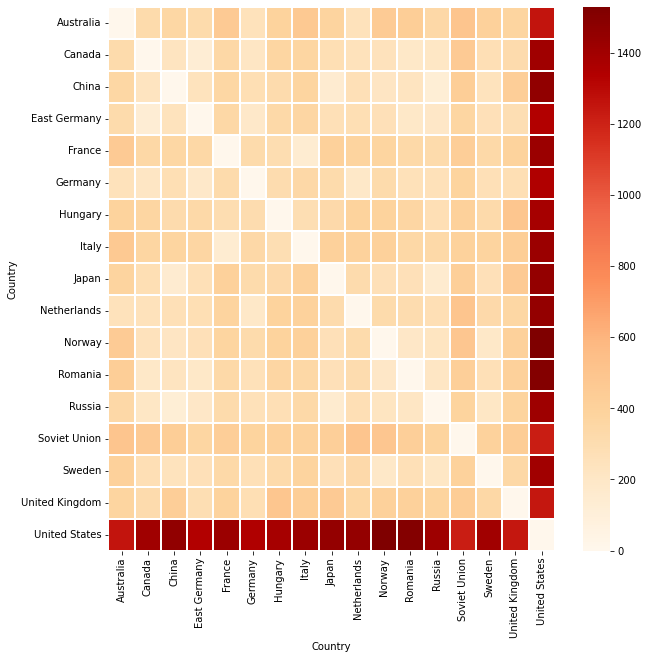

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

top_countries = (data.groupby("Country")
                    .filter(lambda x: len(x)> 500)
                    .groupby(["Country","Sport"])
                    .size()
                    .unstack()
                    .fillna(0))
                    

#making pairwise distance matrix
pairwise_top = pd.DataFrame(
                squareform(pdist(top_countries)),
                columns = top_countries.index,
                index = top_countries.index)

#plot it with seaborn
plt.figure(figsize=(10,10))
sns.heatmap(
        pairwise_top,
        cmap="OrRd",
        linewidth=0.05)

<AxesSubplot:xlabel='Country', ylabel='Country'>

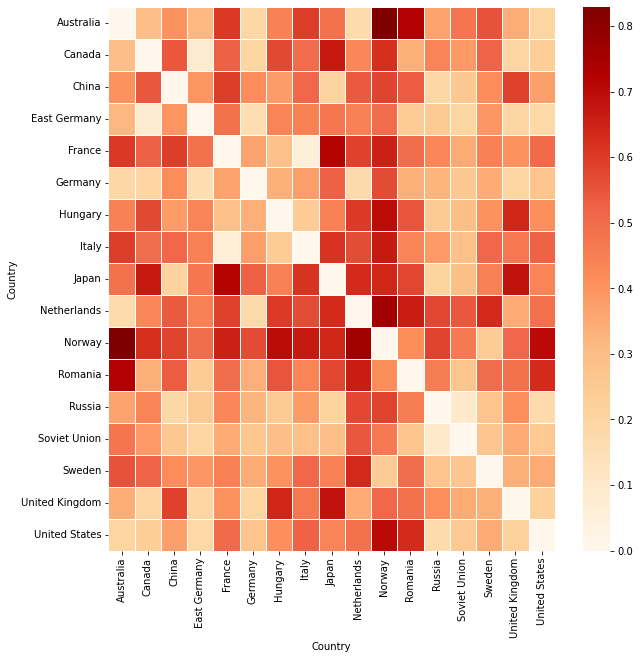

In [11]:
pairwise_top = pd.DataFrame(
    squareform(pdist(top_countries, metric="cosine")),
    columns = top_countries.index,
    index = top_countries.index)

#plot it with seaborn
plt.figure(figsize=(10,10))
sns.heatmap(
    pairwise_top,
    cmap = "OrRd",
    linewidth = 1)

In [12]:
top_countries.head()

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Boxing,Canoe / Kayak,Cricket,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Australia,354.0,2.0,81.0,0.0,24.0,48.0,0.0,4.0,33.0,0.0,...,60.0,0.0,2.0,9.0,4.0,0.0,4.0,0.0,4.0,3.0
Canada,112.0,0.0,83.0,0.0,0.0,9.0,0.0,17.0,30.0,0.0,...,0.0,0.0,2.0,2.0,2.0,0.0,2.0,0.0,2.0,14.0
China,118.0,15.0,15.0,47.0,0.0,24.0,0.0,5.0,4.0,0.0,...,15.0,61.0,5.0,4.0,0.0,0.0,64.0,0.0,43.0,7.0
East Germany,144.0,0.0,139.0,0.0,0.0,0.0,0.0,13.0,52.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,11.0,7.0
France,89.0,46.0,100.0,0.0,0.0,26.0,2.0,19.0,47.0,12.0,...,0.0,3.0,4.0,26.0,0.0,6.0,0.0,1.0,15.0,16.0


In [13]:
fraction_medal = top_countries.apply(lambda x: x/x.sum(), axis=1)
fraction_medal

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Boxing,Canoe / Kayak,Cricket,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.329302,0.001860,0.075349,0.000000,0.022326,0.044651,0.000000,0.003721,0.030698,0.000000,...,0.055814,0.000000,0.001860,0.008372,0.003721,0.000000,0.003721,0.000000,0.003721,0.002791
Canada,0.189189,0.000000,0.140203,0.000000,0.000000,0.015203,0.000000,0.028716,0.050676,0.000000,...,0.000000,0.000000,0.003378,0.003378,0.003378,0.000000,0.003378,0.000000,0.003378,0.023649
China,0.173785,0.022091,0.022091,0.069219,0.000000,0.035346,0.000000,0.007364,0.005891,0.000000,...,0.022091,0.089838,0.007364,0.005891,0.000000,0.000000,0.094256,0.000000,0.063328,0.010309
East Germany,0.174545,0.000000,0.168485,0.000000,0.000000,0.000000,0.000000,0.015758,0.063030,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029091,0.000000,0.013333,0.008485
France,0.067732,0.035008,0.076104,0.000000,0.000000,0.019787,0.001522,0.014460,0.035769,0.009132,...,0.000000,0.002283,0.003044,0.019787,0.000000,0.004566,0.000000,0.000761,0.011416,0.012177
Germany,0.144509,0.004955,0.081751,0.000000,0.000000,0.000000,0.000000,0.018167,0.091660,0.000000,...,0.000000,0.004955,0.000826,0.010735,0.001652,0.000000,0.001652,0.000000,0.016515,0.019818
Hungary,0.234568,0.000000,0.041785,0.000000,0.000000,0.000000,0.000000,0.018993,0.130104,0.000000,...,0.000000,0.000000,0.000000,0.000950,0.000000,0.000000,0.000000,0.000000,0.018993,0.048433
Italy,0.092020,0.009772,0.057818,0.000000,0.000000,0.018730,0.000000,0.035831,0.017915,0.000000,...,0.000000,0.000000,0.000814,0.000814,0.000000,0.000000,0.038274,0.000000,0.011401,0.016287
Japan,0.190341,0.004261,0.035511,0.000000,0.090909,0.000000,0.000000,0.004261,0.000000,0.000000,...,0.063920,0.000000,0.001420,0.004261,0.000000,0.000000,0.136364,0.000000,0.017045,0.079545


<AxesSubplot:xlabel='Sport', ylabel='Country'>

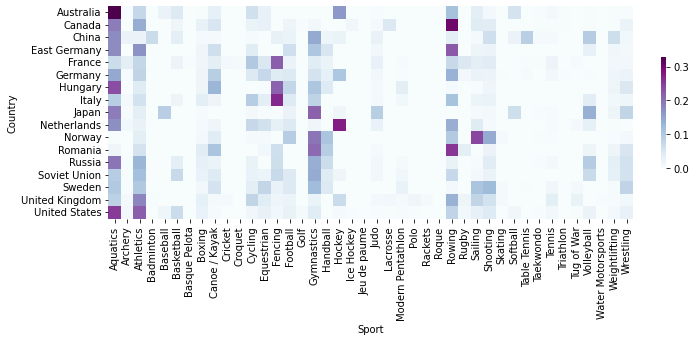

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(fraction_medal,
           cmap="BuPu",
           square=True,
           cbar_kws = {'fraction':0.01}
           )

In [15]:
pairwise = pd.DataFrame(squareform(pdist(summary, metric="cosine")),
                       columns = summary.index,
                       index = summary.index
                       )

#move to long form
long_form = pairwise.unstack()

#renaem columns and turn into a dataframe
long_form.index.rename(["Country A","Country B"], inplace=True)
long_form = long_form.to_frame("cosine distance").reset_index()

long_form


,Country A,Country B,cosine distance
0,Afghanistan,Afghanistan,0.000000
1,Afghanistan,Algeria,1.000000
2,Afghanistan,Argentina,1.000000
3,Afghanistan,Armenia,1.000000
4,Afghanistan,Australasia,1.000000
...,...,...,...
18764,Zimbabwe,Virgin Islands*,1.000000
18765,Zimbabwe,West Germany,0.442550
18766,Zimbabwe,Yugoslavia,0.787871
18767,Zimbabwe,Zambia,1.000000


In [16]:
long_form[(long_form["cosine distance"]<0.05) & (long_form["Country A"]!=long_form["Country B"])]

,Country A,Country B,cosine distance
272,Algeria,Zambia,0.026671
1034,Azerbaijan,Mongolia,0.045618
1105,Bahamas,Barbados,0.021450
1111,Bahamas,British West Indies,0.021450
1113,Bahamas,Burundi,0.021450
...,...,...,...
17033,United Arab Emirates,Haiti,0.010051
17037,United Arab Emirates,Independent Olympic Participants,0.000000
17051,United Arab Emirates,Kuwait,0.000000
18164,Virgin Islands*,Netherlands Antilles*,0.000000
